# Decision Trees

#EN
In this challenge, we will use decision trees in both a classification and regression task. We visualize each of these representations. We will use the `mpg` dataset. It's a car dataset.

# FR
Dans ce défi, nous allons utiliser des arbres de décision à la fois dans une tâche de classification et de régression. Nous visualiserons chacune de ces représentations. Nous utiliserons le jeu de données `mpg`. C'est un jeu de données sur les voitures.

# MISSION 1 : Regression Trees

# Exercice 1
# EN
- Drop the rows with missing values
- Drop the "name" column
- Transform the "origin" column (encode it) to represent the following:
  - USA = 0, Japan = 1, Europe = 2

# FR
- Supprimer les lignes avec des valeurs manquantes
- Supprimez la colonne "nom"
- Transformez la colonne "origine" (encodez-la) pour représenter ce qui suit :
  - États-Unis = 0, Japon = 1, Europe = 2

In [68]:
# Load in the necessary libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

data = sns.load_dataset("mpg")

In [69]:
df = data.copy()
print(f"\nshape: {df.shape} \nlist columns :\n{df.columns.tolist()} ")
print(f"liste des columns numeriques: \n{
      df.select_dtypes(include=[np.number]).columns.tolist()}\n")
print(f"liste des columns nonnumerique: \n{
      df.select_dtypes(exclude=[np.number]).columns.tolist()} ")
print(f"\Colonne avec des na :\n{df.isna().sum()} \n")
print(f"\ndf head :\n{df.head(2)} \n")
print(f"\ndf describe :\n{df.describe()} \n")


shape: (398, 9) 
list columns :
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'name'] 
liste des columns numeriques: 
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']

liste des columns nonnumerique: 
['origin', 'name'] 
\Colonne avec des na :
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64 


df head :
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320   


df describe :
              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  3

<>:5: SyntaxWarning: invalid escape sequence '\C'
<>:5: SyntaxWarning: invalid escape sequence '\C'
C:\Users\romar\AppData\Local\Temp\ipykernel_44648\1127097636.py:5: SyntaxWarning: invalid escape sequence '\C'
  print(f"\Colonne avec des na :\n{df.isna().sum()} \n")


In [44]:
# Création  tableau croisé consommmation moyenne en miles par gallon (mpg ) pour chaque combinaison de nombre de cylindres (cylinders) et d’année de modèle (model_year)
df_avg_mpg = data.pivot_table(
    index='cylinders', columns='model_year', values='mpg', aggfunc='mean')

In [47]:
print(f"\nshape: {df_avg_mpg.shape} \nlist columns :\n{
      df_avg_mpg.columns.tolist()} ")
print(f"liste des columns numeriques: \n{
      df_avg_mpg.select_dtypes(include=[np.number]).columns.tolist()}\n")
print(f"liste des columns nonnumerique: \n{
      df_avg_mpg.select_dtypes(exclude=[np.number]).columns.tolist()} ")
print(f"Colonne avec des na :{df_avg_mpg.isna().sum()} \n")
print(f"\ndf_avg_mpg head :\n{df_avg_mpg.head(2)} \n")
print(f"\ndf_avg_mpg describe :\n{df_avg_mpg.describe()} \n")


shape: (5, 13) 
list columns :
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82] 
liste des columns numeriques: 
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]

liste des columns nonnumerique: 
[] 
Colonne avec des na :model_year
70    2
71    2
72    2
73    1
74    2
75    2
76    2
77    1
78    1
79    1
80    1
81    2
82    3
dtype: int64 


df_avg_mpg head :
model_year         70         71         72         73    74     75  \
cylinders                                                             
3                 NaN        NaN  19.000000  18.000000   NaN    NaN   
4           25.285714  27.461538  23.428571  22.727273  27.8  25.25   

model_year         76         77         78      79      80         81  \
cylinders                                                                
3                 NaN  21.500000        NaN     NaN  23.700        NaN   
4           26.766667  29.107143  29.576471  31.525  34.612  32.814286   

model_year         82  
cylinders       

In [70]:
# EXERCICE 1
# INSERT CODE HERE
# Supprimer les lignes avec des valeurs manquantes
df = df.dropna(axis=0)
# - Supprimez la colonne "nom"
df.drop("name", axis=1, inplace=True)

In [71]:
# - Transformez la colonne "origine" (encodez-la) pour représenter ce qui suit :
#   - États-Unis = 0, Japon = 1, Europe = 2
df["origin"].replace(["usa", "japan", "europe"], [0, 1, 2], inplace=True)

In [72]:
df["origin"].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1,
       2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0,

In [73]:
# df=data.copy()
print(f"\nshape: {df.shape} \nlist columns :\n{df.columns.tolist()} ")
print(f"liste des colonnes numeriques: \n{
      df.select_dtypes(include=[np.number]).columns.tolist()}\n")
print(f"liste des colonnes non numeriques: \n{
      df.select_dtypes(exclude=[np.number]).columns.tolist()} ")
print(f"Colonne avec des na :{df.isna().sum()} \n")
print(f"\ndf head :\n{df.head(2)} \n")
print(f"\ndf describe :\n{df.describe()} \n")


shape: (392, 8) 
list columns :
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin'] 
liste des colonnes numeriques: 
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']

liste des colonnes non numeriques: 
[] 
Colonne avec des na :mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64 


df head :
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   

   model_year  origin  
0          70       0  
1          70       0   


df describe :
              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388 

# Exercice 2
# EN
- Prepare your X and y (mpg column) as a target.
- Split into train and test splits using random state of 42 and a test size of 20%.

# FR
- Préparez votre X et y (colonne mpg) comme cible.
- Diviser le dataset en 2 parties (entraînement et test) en utilisant un état aléatoire de 42 et une taille de test de 20 %.

In [113]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score

In [78]:
# Exercice 2
# INSERT CODE HERE
X = df.copy()
X.drop("mpg", axis=1, inplace=True)
y = df["mpg"]
# Creation train et test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [80]:
your_dataframe = X
print(f"\nshape: {your_dataframe.shape} \nlist columns :\n{
      your_dataframe.columns.tolist()} ")
print(f"liste des colonnes numeriques: \n{
      your_dataframe.select_dtypes(include=[np.number]).columns.tolist()}\n")
print(f"liste des colonnes non numeriques: \n{
      your_dataframe.select_dtypes(exclude=[np.number]).columns.tolist()} ")
print(f"Colonne avec des na :{your_dataframe.isna().sum()} \n")
print(f"\ndf head :\n{your_dataframe.head(2)} \n")
print(f"\ndf describe :\n{your_dataframe.describe()} \n")


shape: (392, 7) 
list columns :
['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin'] 
liste des colonnes numeriques: 
['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']

liste des colonnes non numeriques: 
[] 
Colonne avec des na :cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64 


df head :
   cylinders  displacement  horsepower  weight  acceleration  model_year  \
0          8         307.0       130.0    3504          12.0          70   
1          8         350.0       165.0    3693          11.5          70   

   origin  
0       0  
1       0   


df describe :
        cylinders  displacement  horsepower       weight  acceleration  \
count  392.000000    392.000000  392.000000   392.000000    392.000000   
mean     5.471939    194.411990  104.469388  2977.584184     15.541327   
std      1.705783    104.644

# Exercice 3

# EN
-  Fit a decision tree (Regression)

# FR
- Entraîne l'arbre de decision (Regression)

In [106]:
# Exercice 3
# INSERT CODE HERE
# Choix du modéle
# model = LogisticRegression()
# model = LinearRegression()
# model = KNeighborsRegressor()
model = DecisionTreeRegressor(
    criterion='squared_error',
    splitter='best',
    max_depth=2,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=0
)

# model = DecisionTreeClassifier()
# model = RandomForestClassifier()
# model = svm.SVR(kernel="linear")
# model = SGDRegressor()
# Entrainnement modéle
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

# Exercice 4

# EN
- Predict on the xtest set

# FR
- Réalise une prédiction sur le X_test.

In [107]:
# Exercice 4
# INSERT CODE HERE
#  Scores du train set et du test set
prediction_train = model.predict(X_train)
prediction_test = model.predict(X_test)

# Exercice 5

# EN
- Print out the R2 score (train and test data).

# FR
- Affiche le score R2 (Entraînement et test).

In [108]:
# Exercice 5
# INSERT CODE HERE
from sklearn.metrics import mean_squared_error, r2_score
# Calculer l'erreur quadratique moyenne
mse_train = mean_squared_error(y_train, prediction_train)
mse_test = mean_squared_error(y_test, prediction_test)

# Calculer le coefficient de détermination R^2
r2_train = r2_score(y_train, prediction_train)
r2_test = r2_score(y_test, prediction_test)

print(f"MSE pour le jeu d'entraînement : {mse_train:.3f}")
print(f"MSE pour le jeu de test : {mse_test:.3f}")
print(f"Score R² pour le jeu d'entraînement : {r2_train:.3f}")
print(f"Score R² pour le jeu de test : {r2_test:.3f}")
# score_train_set = accuracy_score(y_train, prediction_train)
# score_test_set = accuracy_score(y_test, prediction_test)
# print(f"\nscore_train_set :{score_train_set:.3f}  \nscore_test_set:  { score_test_set:.3f} \n")

MSE pour le jeu d'entraînement : 15.315
MSE pour le jeu de test : 21.265
Score R² pour le jeu d'entraînement : 0.757
Score R² pour le jeu de test : 0.583


# Exercice 6

# EN
- Print each feature with importance % using a method from the DecisionTree object.


# FR
- Affiche chaque caractéristique avec le % d'importance en utilisant une méthode de l'objet DecisionTree.



In [109]:
# Exercice 6
# INSERT CODE HERE
# Obtenir les importances des caractéristiques
importances = model.feature_importances_

# Créer un DataFrame avec les noms des caractéristiques et leurs importances
df_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Calculer le pourcentage d'importance
df_importances['Importance (%)'] = df_importances['Importance'] * 100

print(df_importances)

        Feature  Importance  Importance (%)
0     cylinders    0.000000        0.000000
1  displacement    0.782327       78.232678
2    horsepower    0.217673       21.767322
3        weight    0.000000        0.000000
4  acceleration    0.000000        0.000000
5    model_year    0.000000        0.000000
6        origin    0.000000        0.000000


In [ ]:
# Displacement est la caractéristique la plus importante pour prédire la cible, avec une importance de 70.52%. Cela signifie que cette caractéristique a le plus grand impact sur la sortie du modèle.

# Horsepower est la deuxième caractéristique la plus importante, avec une importance de 19.62%.

# Exercice 7

# EN
- Plot the decision tree (dataviz)
- Use column names as feature names and a max_depth of only 2

# FR
- Tracer l'arbre de décision (dataviz)
- Utilisez les noms de colonnes comme noms de fonctionnalités et un max_depth de seulement 2

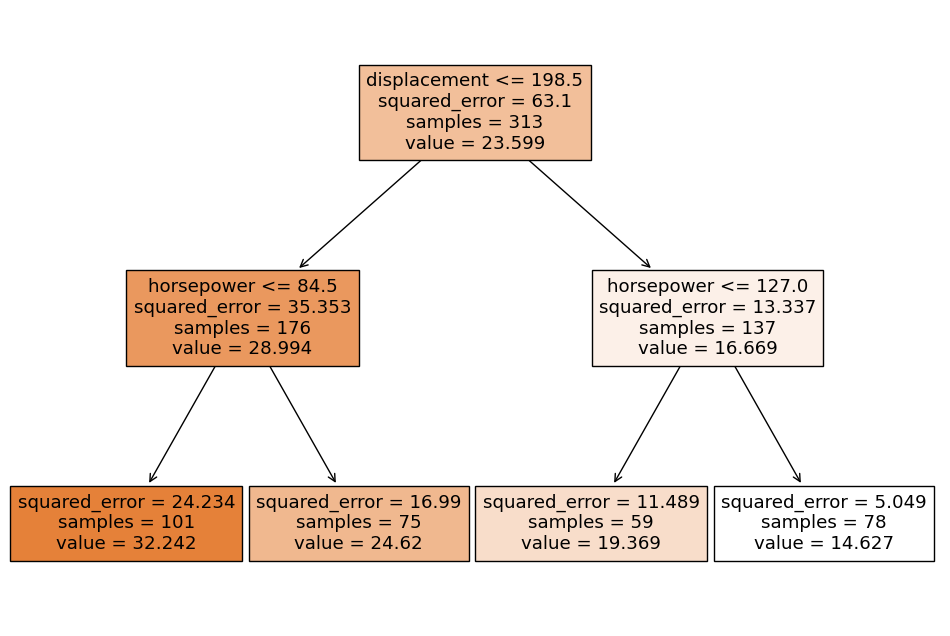

In [116]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Créer une instance de DecisionTreeRegressor avec une profondeur maximale de 2
model = DecisionTreeRegressor(
    criterion='squared_error',
    splitter='best',
    max_depth=2,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=0
)

# Entraîner le modèle en utilisant les données d'entraînement
model.fit(X_train, y_train)

# Tracer l'arbre de décision
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

Nombre total de nœuds : 15
Indices des nœuds parents : [ 1  2  3 -1 -1  6 -1 -1  9 10 -1 -1 13 -1 -1]
Indices des nœuds enfants gauche : [ 1  2  3 -1 -1  6 -1 -1  9 10 -1 -1 13 -1 -1]
Indices des nœuds enfants droit : [ 8  5  4 -1 -1  7 -1 -1 12 11 -1 -1 14 -1 -1]
Seuils de division : [198.5  84.5  76.5  -2.   -2.   78.5  -2.   -2.  127.   81.5  -2.   -2.
  76.5  -2.   -2. ]
Importances des caractéristiques : 
[0.         0.70519814 0.19621309 0.         0.         0.09858877
 0.        ]


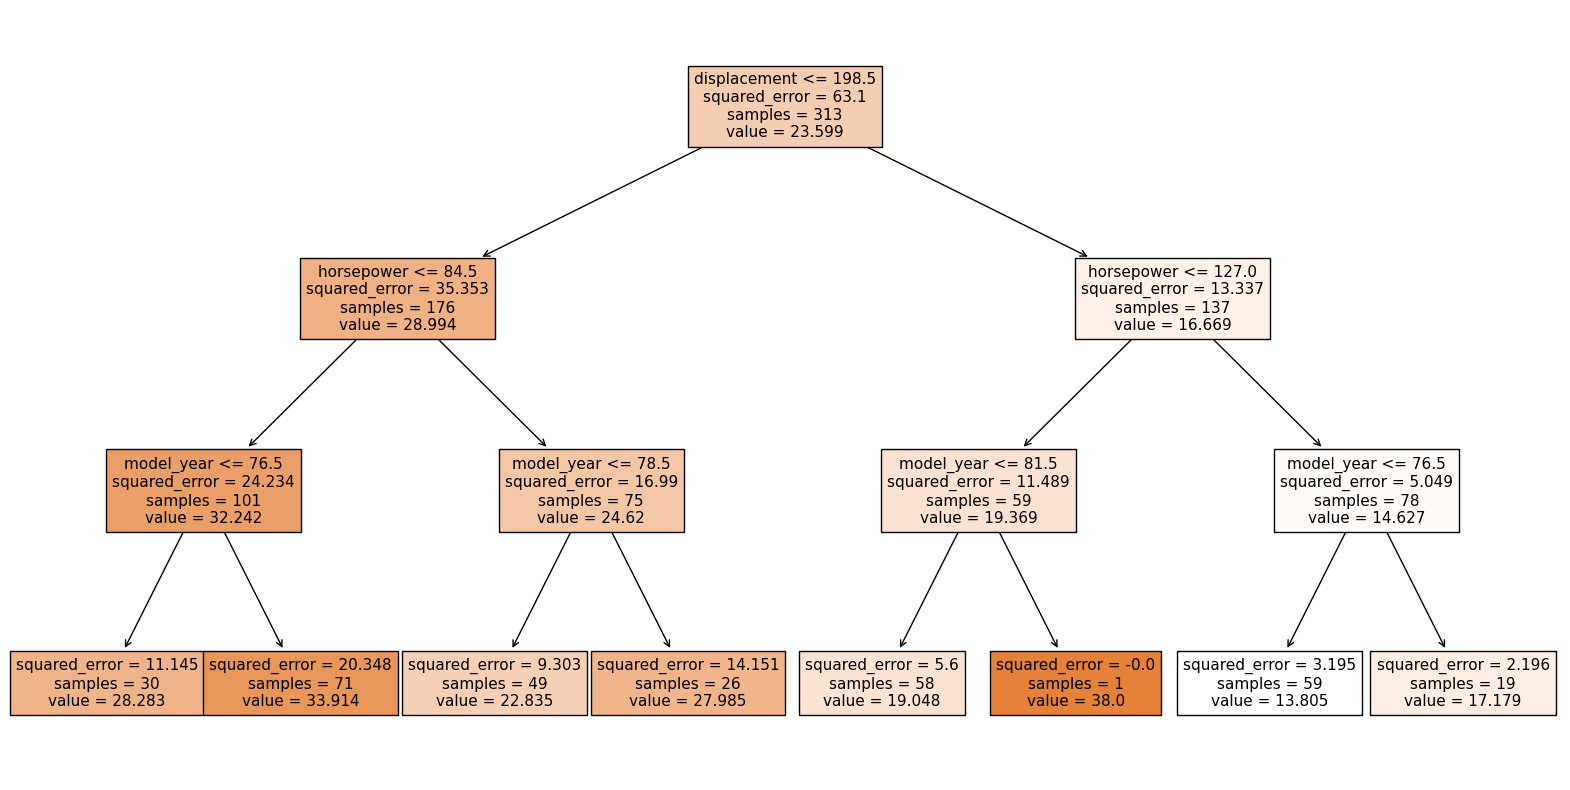

In [120]:
# EXERCICE 7
# INSERT CODE HERE
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Créer une instance de DecisionTreeRegressor avec une profondeur maximale de 2
model = DecisionTreeRegressor(
    criterion='squared_error',
    splitter='best',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=0
)

# Entraîner le modèle en utilisant les données d'entraînement
model.fit(X_train, y_train)

n_nodes = model.tree_.node_count
print(f"Nombre total de nœuds : {n_nodes}")
parent_nodes = model.tree_.children_left
print(f"Indices des nœuds parents : {parent_nodes}")
left_child_nodes = model.tree_.children_left
print(f"Indices des nœuds enfants gauche : {left_child_nodes}")
right_child_nodes = model.tree_.children_right
print(f"Indices des nœuds enfants droit : {right_child_nodes}")
thresholds = model.tree_.threshold
print(f"Seuils de division : {thresholds}")
feature_importances = model.tree_.compute_feature_importances()
print(f"Importances des caractéristiques : \n{feature_importances}")


# Tracer l'arbre de décision
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

# MISSION 2 : Classification Trees

# EXERCICE 1

# EN
- Drop rows with missing values
- Turn the species column into numeric (encode it) :
  - Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2
- Turn the island column into numeric (encode it) :
  - Specifically, Torgersen = 0, Biscoe = 1, Dream = 2

# FR
- Supprimer les lignes avec des valeurs manquantes
- Transformez la colonne des espèces en numérique (encodez-la) :
  - Plus précisément, Adelie = 0, Chinstrap = 1 et Gentoo = 2
- Transformez la colonne 'island' en numérique (encodez-la) :
  - Plus précisément, Torgersen = 0, Biscoe = 1, Dream = 2

In [138]:
# Load in the Penguins dataset
data = sns.load_dataset('penguins')
df = data

In [151]:
# Résumé des informations du dataframe
your_dataframe = df
print(f"\nshape: {your_dataframe.shape} \nlist columns :\n{
      your_dataframe.columns.tolist()} ")
print(f"liste des colonnes numeriques: \n{
      your_dataframe.select_dtypes(include=[np.number]).columns.tolist()}\n")
print(f"liste des colonnes non numeriques: \n{
      your_dataframe.select_dtypes(exclude=[np.number]).columns.tolist()} ")
print(f"Colonne avec des na :{your_dataframe.isna().sum()} \n")
print(f"\ndf head :\n{your_dataframe.head(2)} \n")
print(f"\ndf describe :\n{your_dataframe.describe()} \n")


shape: (333, 7) 
list columns :
['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex'] 
liste des colonnes numeriques: 
['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

liste des colonnes non numeriques: 
['sex'] 
Colonne avec des na :species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64 


df head :
   species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0        0       0            39.1           18.7              181.0   
1        0       0            39.5           17.4              186.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female   


df describe :
          species      island  bill_length_mm  bill_depth_mm  \
count  333.000000  333.000000      333.000000     333.000000   
mean     0.918919    1.228228       43.992793     

In [140]:
# Exercice 1
# INSERT CODE HERE
# Supprimer les lignes avec des valeurs manquantes
df.dropna(axis=0, inplace=True)

In [141]:
# - Transformez la colonne des espèces en numérique (encodez-la) :
#   - Plus précisément, Adelie = 0, Chinstrap = 1 et Gentoo = 2
your_dataframe = df
your_col_to_transform = 'species'
# Créer un dictionnaire pour mapper les valeurs
dico = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
# Remplace les valeurs
df[your_col_to_transform].replace(dico, inplace=True)
df[your_col_to_transform]

0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: species, Length: 333, dtype: int64

In [142]:
# - Transformez la colonne 'island' en numérique (encodez-la) :
#   - Plus précisément, Torgersen = 0, Biscoe = 1, Dream = 2
your_dataframe = df
your_col_to_transform = 'island'
# Créer un dictionnaire pour mapper les valeurs
dico = {'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}
# Remplace les valeurs
df[your_col_to_transform].replace(dico, inplace=True)
df[your_col_to_transform]

0      0
1      0
2      0
4      0
5      0
      ..
338    1
340    1
341    1
342    1
343    1
Name: island, Length: 333, dtype: int64

# EXERCICE 2

# EN
- Save as variable your X and your y (column "sex")
- Using a random state of 42 and a test size of 0.20, split in training and testing sets.

# FR
- Enregistrez comme variable votre X et votre y (colonne "sex")
- Utilisation d'un état aléatoire de 42 et d'une taille de test de 0.20, divisé en ensembles d'apprentissage et de test.

In [153]:
your_dataframe = df
your_col_to_transform = 'sex'
# Créer un dictionnaire pour mapper les valeurs
dico = {'Male': 0, 'Female': 1}
# Remplace les valeurs
df[your_col_to_transform].replace(dico, inplace=True)
df[your_col_to_transform]

0      0
1      1
2      1
4      1
5      0
      ..
338    1
340    1
341    0
342    1
343    0
Name: sex, Length: 333, dtype: int64

In [154]:
# Exercice 2
# INSERT CODE HERE
# Creation train et test set
X = df.copy()
X.drop('sex', axis=1, inplace=True)
y = df['sex']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [155]:
your_dataframe = X
print(f"\nshape: {your_dataframe.shape} \nlist columns :\n{
      your_dataframe.columns.tolist()} ")
print(f"liste des colonnes numeriques: \n{
      your_dataframe.select_dtypes(include=[np.number]).columns.tolist()}\n")
print(f"liste des colonnes non numeriques: \n{
      your_dataframe.select_dtypes(exclude=[np.number]).columns.tolist()} ")
print(f"Colonne avec des na :{your_dataframe.isna().sum()} \n")
print(f"\ndf head :\n{your_dataframe.head(2)} \n")
print(f"\ndf describe :\n{your_dataframe.describe()} \n")


shape: (333, 6) 
list columns :
['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'] 
liste des colonnes numeriques: 
['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

liste des colonnes non numeriques: 
[] 
Colonne avec des na :species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64 


df head :
   species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0        0       0            39.1           18.7              181.0   
1        0       0            39.5           17.4              186.0   

   body_mass_g  
0       3750.0  
1       3800.0   


df describe :
          species      island  bill_length_mm  bill_depth_mm  \
count  333.000000  333.000000      333.000000     333.000000   
mean     0.918919    1.228228       43.992793      17.164865   
std      0.889718    0.678088        5.468668

# EXERCICE 3
# EN

-  Fit a decision tree (Classification)

# FR
- Entraîne l'arbre de decision (Classification)

In [156]:
# Exercice 3
# INSERT CODE HERE
# Choix du modéle
# model = LogisticRegression()
# model = LinearRegression()
# model = KNeighborsRegressor()
# model = DecisionTreeRegressor()
model = DecisionTreeClassifier(
    splitter="best",

    random_state=42
)
# model = RandomForestClassifier()
# model = svm.SVR(kernel="linear")
# model = SGDRegressor()
# Entrainnement modéle
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Exercice 4

# EN
- Predict on the X_test set

# FR
- Réalise une prédiction sur le X_test.

In [157]:
# Exercice 4
# INSERT CODE HERE
#  Scores du train set et du test set
prediction_train = model.predict(X_train)
prediction_test = model.predict(X_test)
print(f"\nprediction_test :\n{prediction_test} \n")


prediction_test :
[1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1] 



# Exercice 5

# EN
- Print the accuracy score for the predictions (Train et test)

# FR
- Affiche le score de prédiction (Train & test)

In [158]:
# Exercice 5
# INSERT CODE HERE
score_train_set = accuracy_score(y_train, prediction_train)
score_test_set = accuracy_score(y_test, prediction_test)
print(f"\nscore_train_set :{score_train_set:.3f}  \nscore_test_set:  {
      score_test_set:.3f} \n")


score_train_set :1.000  
score_test_set:  0.881 



# Exercice 6

# EN
- Print each feature with importance % using a method from the DecisionTree object.


# FR
- Affiche chaque caractéristique avec le % d'importance en utilisant une méthode de l'objet DecisionTree.

In [159]:
# Exercice 6
# INSERT CODE HERE
# Obtenir les importances des caractéristiques
importances = model.feature_importances_
# Créer un DataFrame avec les noms des caractéristiques et leurs importances
df_importances = pd.DataFrame(
    {'Feature': X.columns, 'Importance': importances})
# Calculer le pourcentage d'importance
df_importances['Importance (%)'] = df_importances['Importance'] * 100
print(df_importances)

             Feature  Importance  Importance (%)
0            species    0.000000        0.000000
1             island    0.000000        0.000000
2     bill_length_mm    0.092392        9.239209
3      bill_depth_mm    0.481777       48.177666
4  flipper_length_mm    0.024094        2.409420
5        body_mass_g    0.401737       40.173705


# Exercice 7

# EN
- Plot the decision tree (dataviz)
- Use column names as feature names and a max_depth of only 2

# FR
- Tracer l'arbre de décision (dataviz)
- Utilisez les noms de colonnes comme noms de fonctionnalités et un max_depth de seulement 2

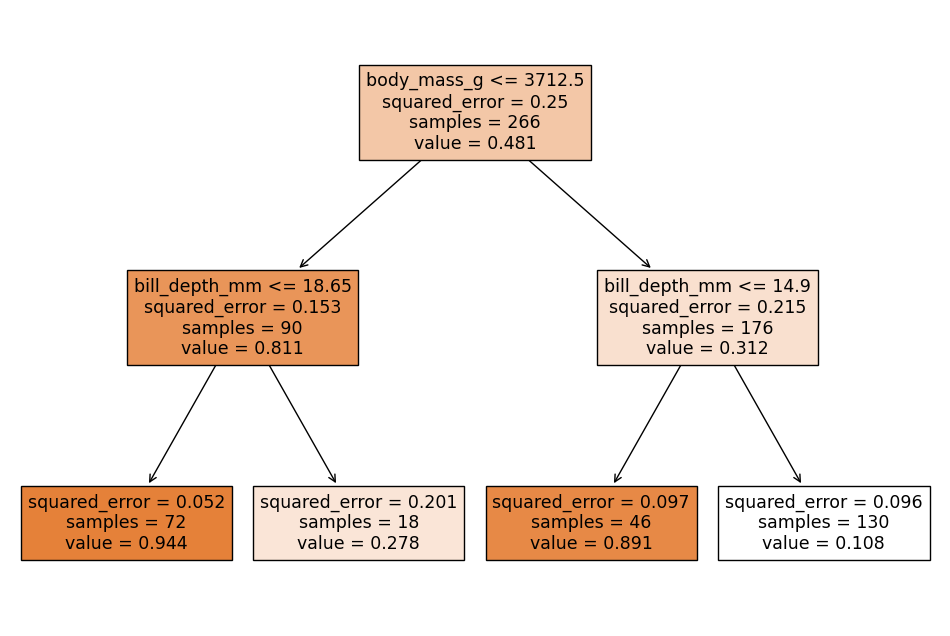

In [160]:
# Exercice 7
# INSERT CODE HERE
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Créer une instance de DecisionTreeRegressor avec une profondeur maximale de 2
model = DecisionTreeRegressor(
    criterion='squared_error',
    splitter='best',
    max_depth=2,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=0
)

# Entraîner le modèle en utilisant les données d'entraînement
model.fit(X_train, y_train)

# Tracer l'arbre de décision
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

# EN

# Effects of Changing the Maximum Depth
In this section, we're going to see how changing the max_depth, which is one of the most important hyperparameters when it comes to decision trees, plays a part in the prediction accuracy.

*** This exercise is only done for you to see how big of an impact choosing the correct max_depth is!***

Choosing the correct max_depth (or any other hyperparameter for that matter) is typically done using cross validation or a more advanced technique (Grid Search, Random Search, Bayesian Optimization).

# Machine Learning Optimization
Using the above dataset, fit and predict the train and test sets using a max_depth from 1 to 10. For example, within the first iteration, you would fit the xtrain and ytrain datasets using max_depth=1, predict the xtest using this model, and then record the accuracy. On the next iteration, the max_depth would then be 2, etc.


# FR
# Effets de la modification de la profondeur maximale
Dans cette section, nous allons voir comment la modification de max_depth joue un rôle dans la précision de la prédiction. C'est l'un des hyperparamètres les plus importants pour les arbres de décision.

*** Cet exercice n'est fait que pour vous permettre de voir l'impact du choix de la profondeur max_correcte ! ***

Le choix de la profondeur max_correcte (ou de tout autre hyperparamètre d'ailleurs) se fait généralement à l'aide d'une validation croisée ou d'une technique plus avancée (Recherche par grille, recherche aléatoire, optimisation bayésienne).

# Optimisation d'algorithmes :
À l'aide de l'ensemble de données ci-dessus, ajustez et prédisez les ensembles d'entraînement et de test à l'aide d'un max_depth de 1 à 10.

***Vous allez faire varier la valeur max_depth du decision tree et l'entraîner pour obtenir le score (train et test) sur chaque changement de max_depth. Ce sera une boucle d'entraînement. ***

Par exemple, dans la première itération, vous ajusterez les ensembles de données xtrain et ytrain à l'aide de max_depth = 1, prédisez le xtest à l'aide de ce modèle, et puis enregistrez la précision. À la prochaine itération, le max_depth serait alors de 2, etc.

# Exercice 8

# EN
- Using a random state of 42, fit multiple decision trees with various max depths.
- Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))

# FR
- En utilisant un état aléatoire de 42, ajustez plusieurs arbres de décision avec différentes profondeurs maximales (max_depth).
- Enregistrez ces précisions dans une liste (c'est-à-dire list_of_accuracies.append(accuracy))

In [170]:
# Résumé des informations du dataframe
# Résumé des informations du dataframe
your_dataframe = X
print(f"\nshape: {your_dataframe.shape} \nlist columns :\n{
      your_dataframe.columns.tolist()} ")
print(f"liste des colonnes numeriques: \n{
      your_dataframe.select_dtypes(include=[np.number]).columns.tolist()}\n")
print(f"liste des colonnes non numeriques: \n{
      your_dataframe.select_dtypes(exclude=[np.number]).columns.tolist()} ")
print(f"Colonne avec des na :{your_dataframe.isna().sum()} \n")
print(f"\ndf head :\n{your_dataframe.head(2)} \n")
print(f"\ndf describe :\n{your_dataframe.describe()} \n")


shape: (333, 6) 
list columns :
['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'] 
liste des colonnes numeriques: 
['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

liste des colonnes non numeriques: 
[] 
Colonne avec des na :species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64 


df head :
   species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0        0       0            39.1           18.7              181.0   
1        0       0            39.5           17.4              186.0   

   body_mass_g  
0       3750.0  
1       3800.0   


df describe :
          species      island  bill_length_mm  bill_depth_mm  \
count  333.000000  333.000000      333.000000     333.000000   
mean     0.918919    1.228228       43.992793      17.164865   
std      0.889718    0.678088        5.468668

In [225]:
# Using a random state of 42, fit multiple decision trees with various max depths.
# Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))
list_of_accuracies_train = {}
list_of_accuracies_test = {}

for i in range(1, 11):
    # your_dataframe, your_colonne = df , 'sex'
    # X = your_dataframe
    # X.drop(your_colonne, axis=1, inplace=True)
    # y = your_dataframe[your_colonne]
    # Creation train et test set
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)
    # Choix du modéle
    model = DecisionTreeRegressor(
        criterion='squared_error',
        splitter='best',
        max_depth=i,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=10
    )
    # Entrainnement modéle
    model.fit(X_train, y_train)
    # predictions
    prediction_train = model.predict(X_train)
    prediction_test = model.predict(X_test)
    # score
    score_train_set = mean_squared_error(y_train, prediction_train)
    score_test_set = mean_squared_error(y_test, prediction_test)
    # liste des scores
    # Ajoute les valeurs associé à l'indice dans le dictionnaire
    list_of_accuracies_train[i] = round(score_train_set*100, 4)
    list_of_accuracies_test[i] = round(score_test_set*100, 4)

    print(f"\navec un max_depth= {i} \nscore_train_set :{
          list_of_accuracies_train[i]:.3f}%  \nscore_test_set :{list_of_accuracies_test[i]:.3f}% \n")


avec un max_depth= 1 
score_train_set :19.399%  
score_test_set :19.939% 


avec un max_depth= 2 
score_train_set :9.149%  
score_test_set :14.549% 


avec un max_depth= 3 
score_train_set :6.281%  
score_test_set :13.229% 


avec un max_depth= 4 
score_train_set :5.184%  
score_test_set :14.250% 


avec un max_depth= 5 
score_train_set :3.469%  
score_test_set :13.581% 


avec un max_depth= 6 
score_train_set :2.209%  
score_test_set :14.935% 


avec un max_depth= 7 
score_train_set :0.987%  
score_test_set :16.103% 


avec un max_depth= 8 
score_train_set :0.551%  
score_test_set :15.214% 


avec un max_depth= 9 
score_train_set :0.301%  
score_test_set :14.925% 


avec un max_depth= 10 
score_train_set :0.188%  
score_test_set :14.925% 



In [231]:
# trouve les meilleurs parametres du train
d = list_of_accuracies_train
# Trouver la valeur maximale du dictionnaire
max_value_train = max(d.values())
# Trouver la clé pour la valeur maximale dictionnaire
max_key_train = max(d, key=d.get)
print(f"\n score max train:{max_value_train} max_depth ={max_key_train}\n")
# trouve les meilleurs parametres du test
d = list_of_accuracies_test
# Trouver la valeur maximale du dictionnaire
max_value_test = max(d.values())
# Trouver la clé pour la valeur maximale dictionnaire
max_key_test = max(d, key=d.get)
print(f"\n score max test:{max_value_test} max_depth ={max_key_test}\n")


 score max train:19.399 max_depth =1


 score max test:19.939 max_depth =1



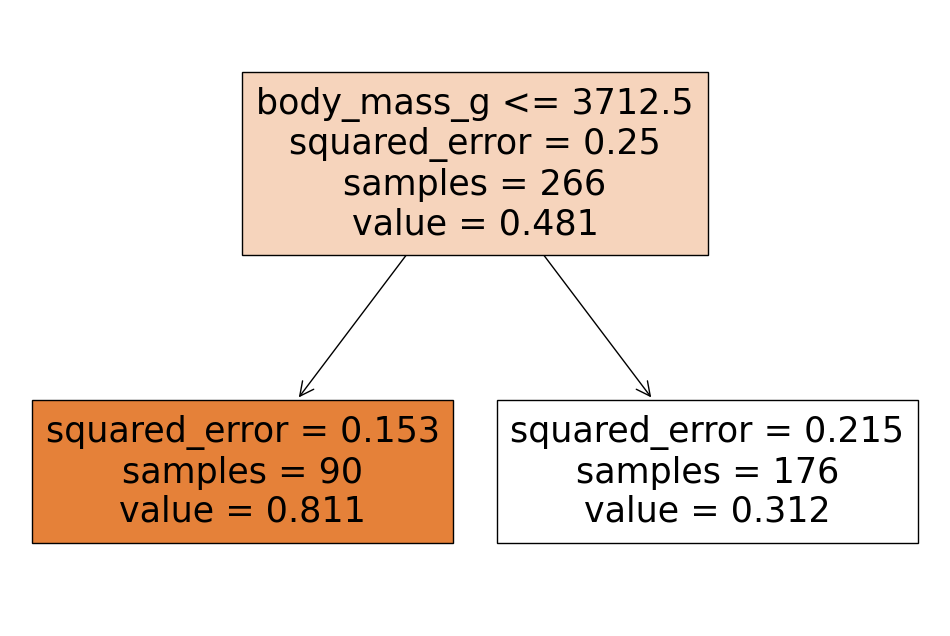

In [232]:
# graphique utilisant  le meilleur max_depth
model = DecisionTreeRegressor(
    criterion='squared_error',
    splitter='best',
    max_depth=max_key_test,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=10
)
# Entrainnement modéle
model.fit(X_train, y_train)
# Tracer l'arbre de décision
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()